In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_excel("G:\ExcelR\Data Science Assignments\Assignment 13\Decision Tree\\heart_disease.xlsx",sheet_name='Heart_disease')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [219]:
missing_values = df.isnull().sum()
print("Missing_Values are:",missing_values)

df.describe()

Missing_Values are: age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [220]:
# Identify NaNs
print("\nCheck for NaNs in the DataFrame:")
print(df.isna())


Check for NaNs in the DataFrame:
       age    sex     cp  trestbps   chol    fbs  restecg  thalch  exang  \
0    False  False  False     False  False  False    False   False  False   
1    False  False  False     False  False  False    False   False  False   
2    False  False  False     False  False  False    False   False  False   
3    False  False  False     False  False  False    False   False  False   
4    False  False  False     False  False  False    False   False  False   
..     ...    ...    ...       ...    ...    ...      ...     ...    ...   
903  False  False  False     False  False  False    False   False  False   
904  False  False  False     False  False  False    False   False  False   
905  False  False  False     False  False  False    False   False  False   
906  False  False  False     False  False  False    False   False  False   
907  False  False  False     False  False  False    False   False  False   

     oldpeak  slope   thal    num  
0      False  Fal

In [221]:
# Option 1: Remove rows with any NaNs
df_dropna = df.dropna()
print("\nDataFrame after dropping rows with any NaNs:")
print(df_dropna)


DataFrame after dropping rows with any NaNs:
     age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
901   51  Male     asymptomatic       110     0   True            normal   
902   62  Male     asymptomatic       160   254   True  st-t abnormality   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   

     thalch  exang  oldpeak        slope 

In [222]:

# Option 2: Replace NaNs with a specific value (e.g., 0)
df_fillna = df.fillna(0)
print("\nDataFrame after replacing NaNs with 0:")
print(df_fillna)


DataFrame after replacing NaNs with 0:
     age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope       

In [ ]:
# Option 4: Impute NaNs using sklearn's SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can use 'mean', 'median', 'most_frequent', or 'constant'
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.drop('sex'))
print("\nDataFrame after imputation:")
print(df_imputed)

In [227]:
df.fillna(0, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [228]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['sex'] = LE.fit_transform(df['sex'])
df['cp'] = LE.fit_transform(df['cp'])
df['fbs'] = LE.fit_transform(df['fbs'])
df['restecg'] = LE.fit_transform(df['restecg'])
#df['exang'] = LE.fit_transform(df['exang'])
df['slope'] = LE.fit_transform(df['slope'])
df['thal'] = LE.fit_transform(df['thal'])

In [229]:
X_cont = df[['age','trestbps','chol','fbs','thalch','oldpeak','num']] #int,float,bool types
X_cont.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63,145,233,1,150,2.3,0
1,41,135,203,0,132,0.0,0
2,57,140,192,0,148,0.4,0
3,52,118,186,0,190,0.0,0
4,57,110,201,0,126,1.5,0


In [230]:
#Standarzation
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X_cont)
SS_X = pd.DataFrame(SS_X)
d1 = ['age','trestbps','chol','fbs','thalch','oldpeak','num'] 
SS_X.columns = d1
SS_X.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.362102,-0.881977
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.769653,-0.881977
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.398913,-0.881977
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.769653,-0.881977
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.620622,-0.881977


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

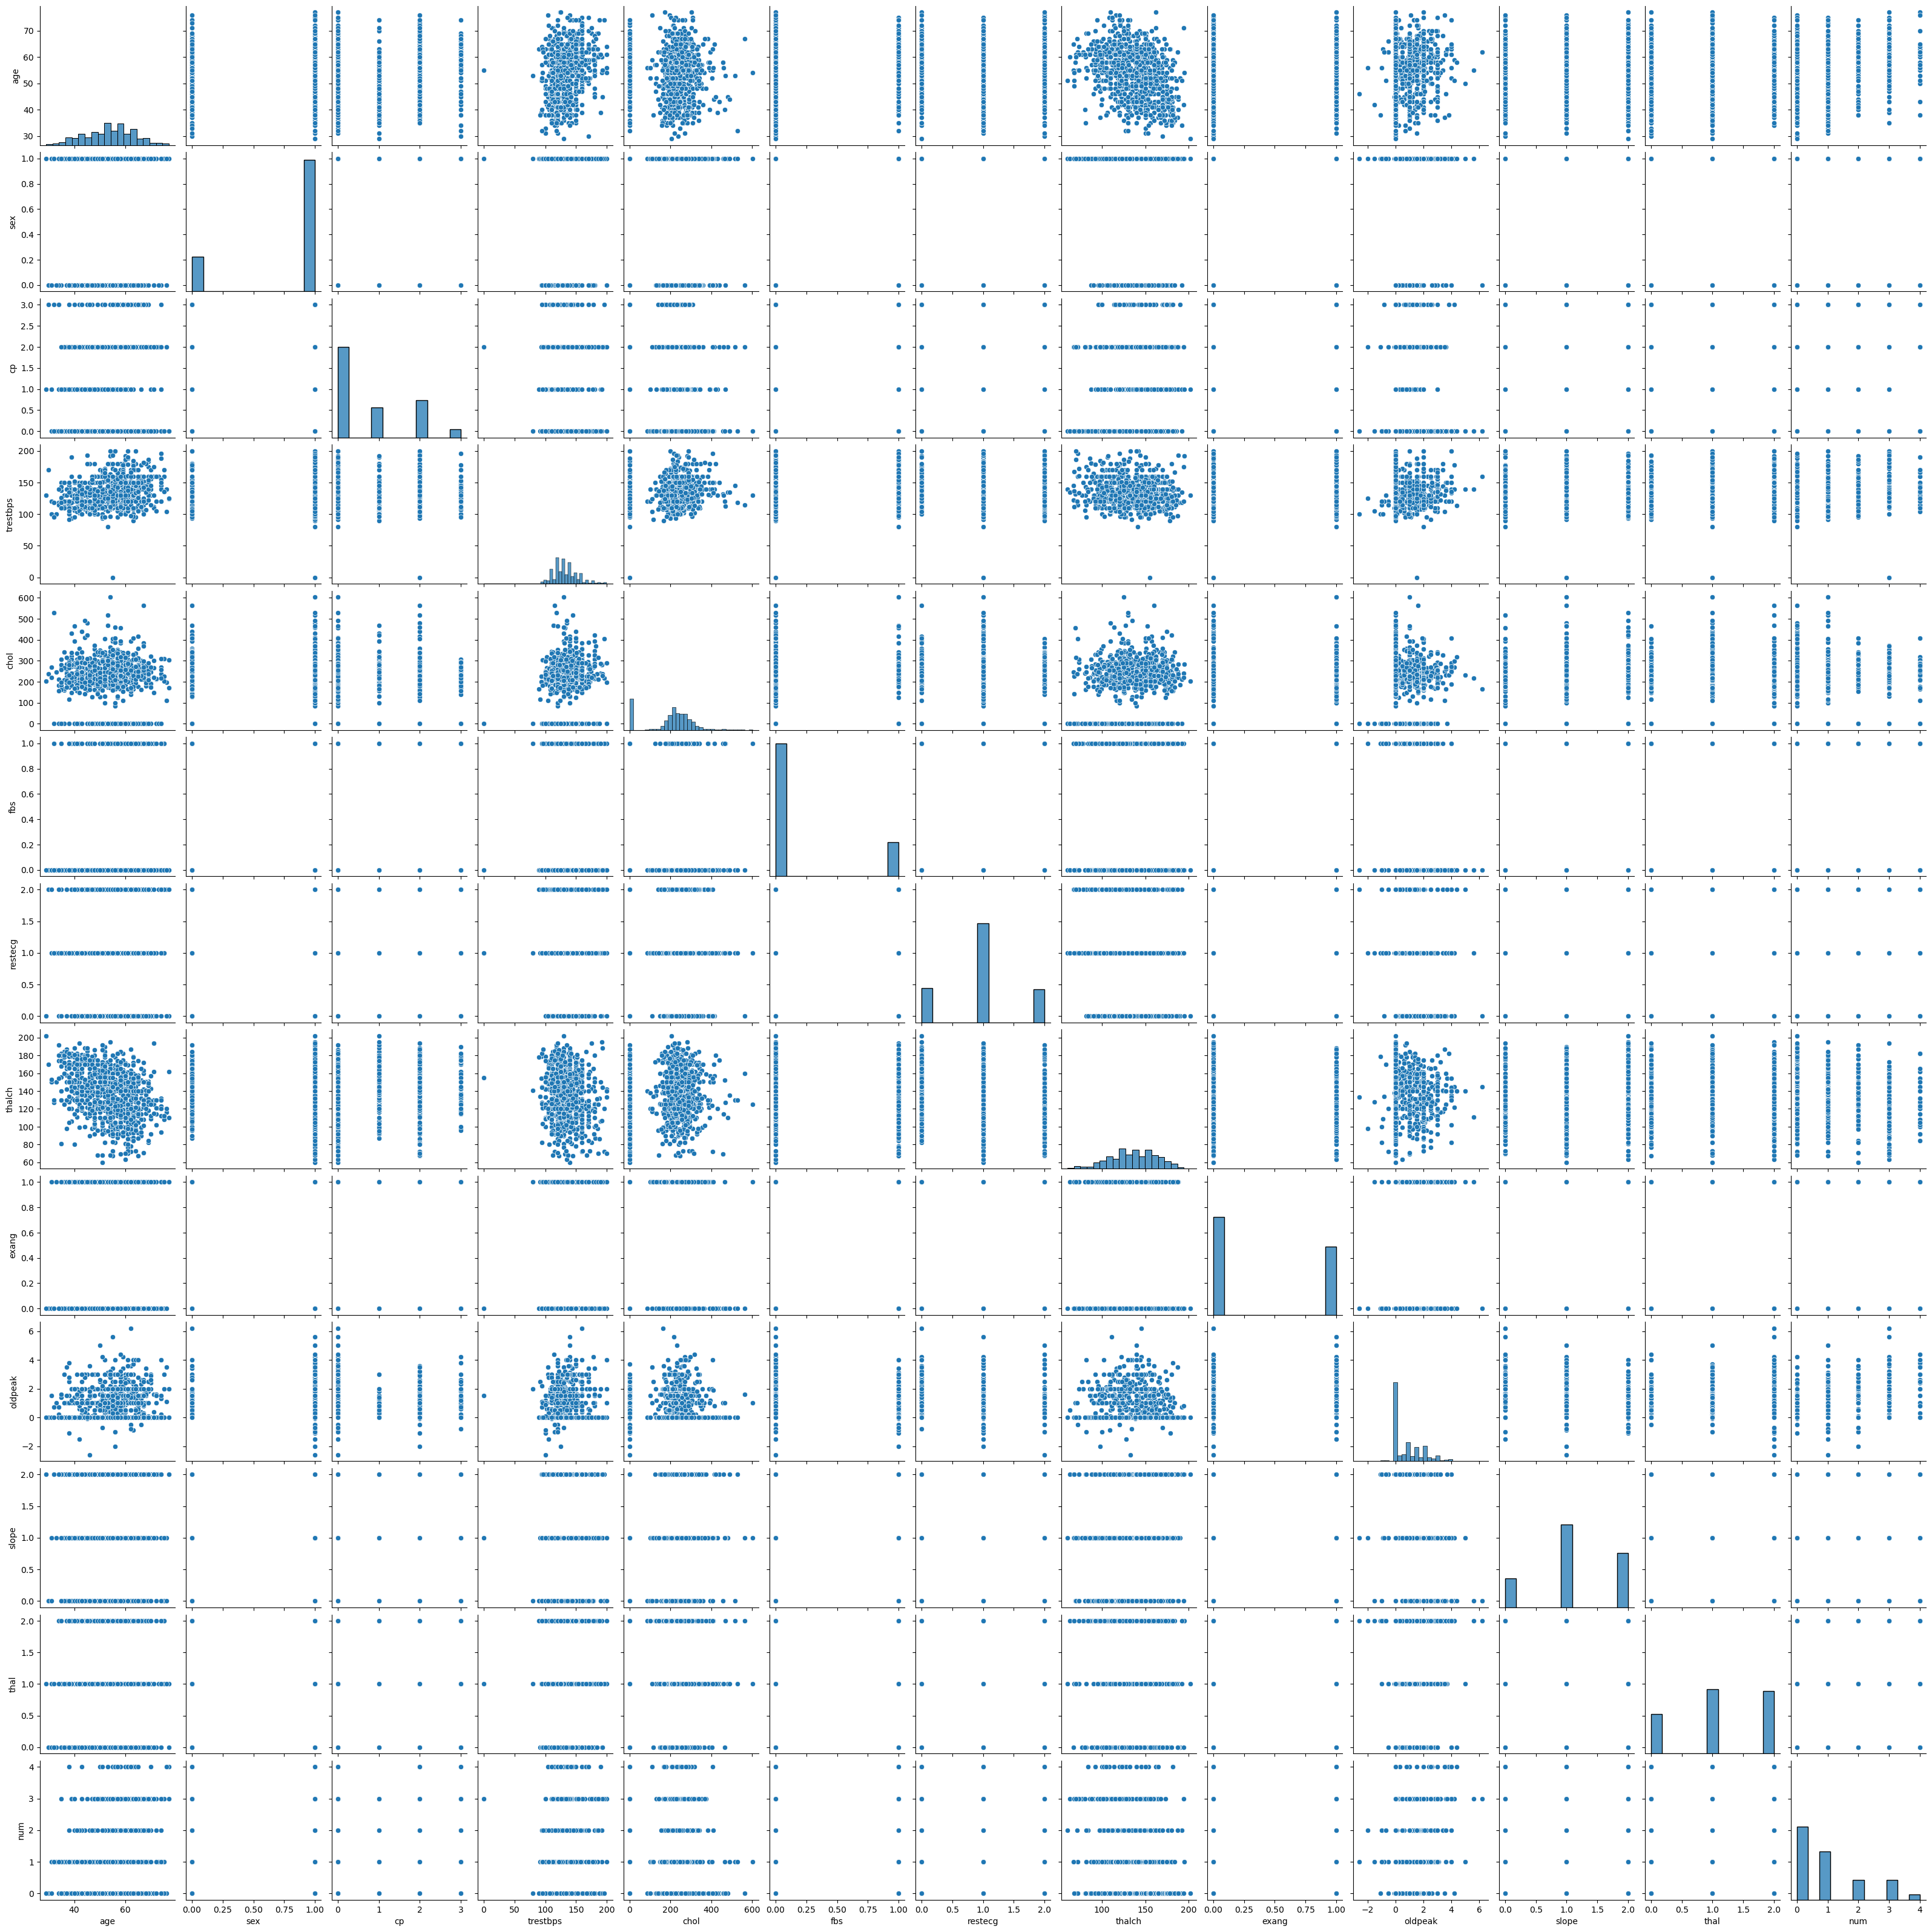

In [231]:
sns.pairplot(df)
plt.show()

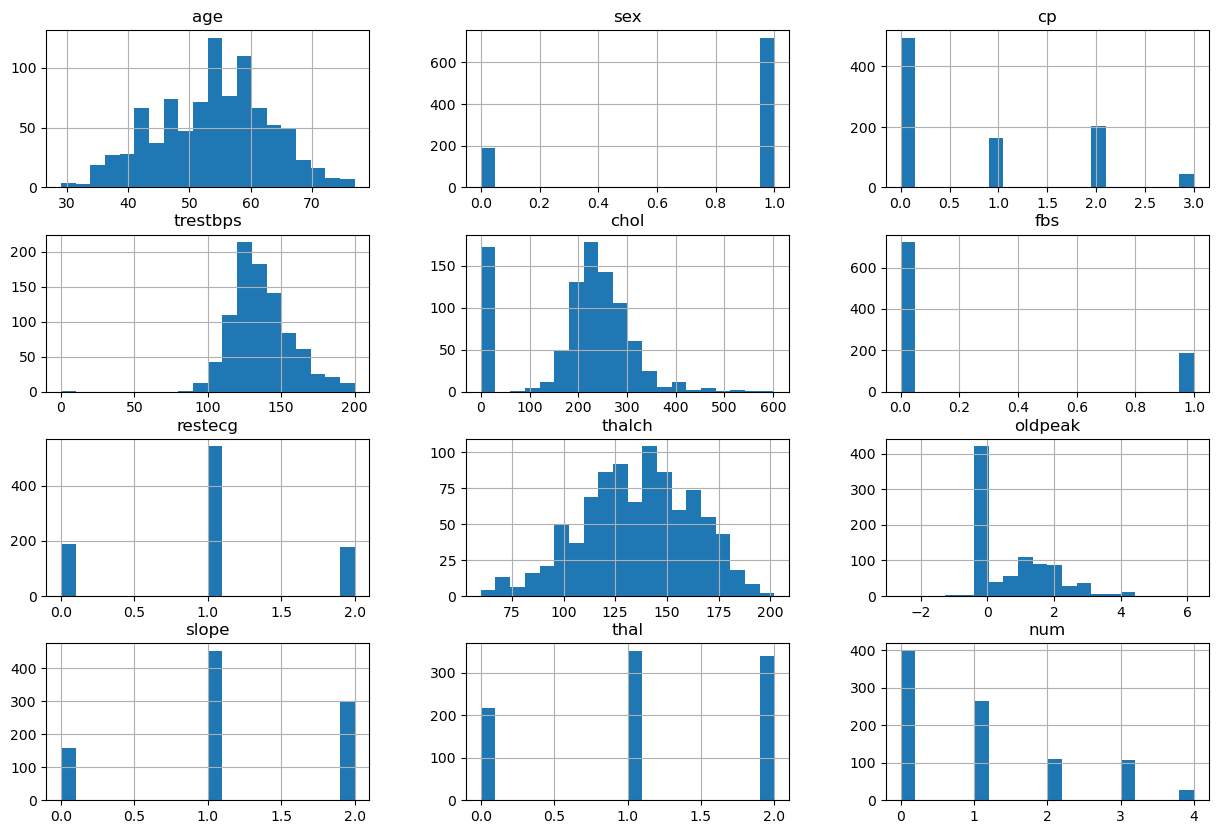

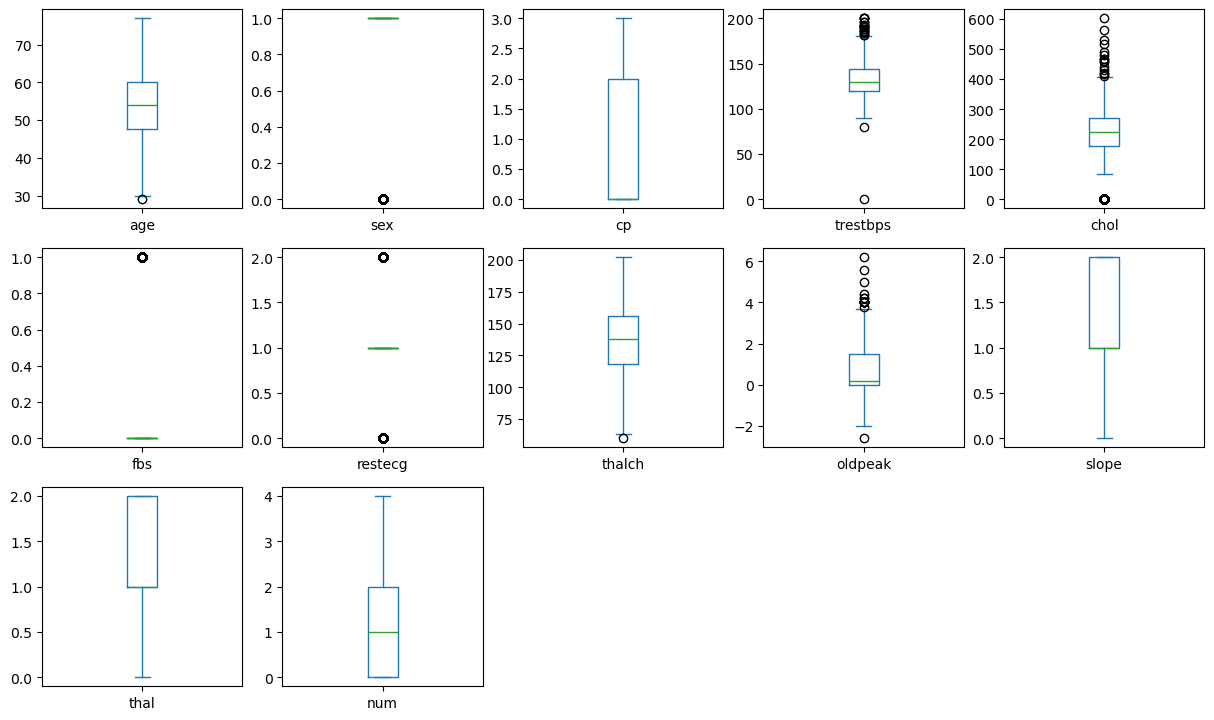

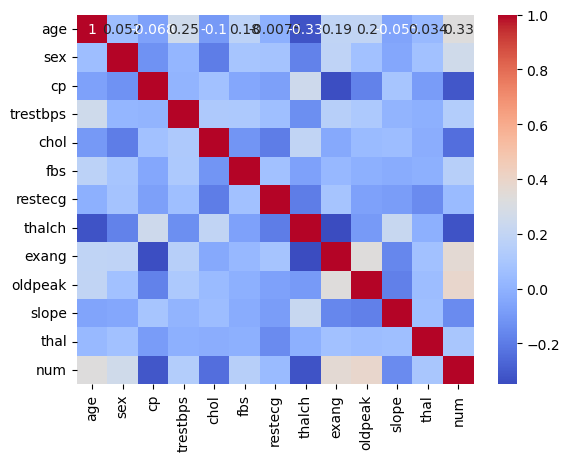

In [233]:
# Visualizing the distribution of features
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Box plots
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15), sharex=False, sharey=False)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [234]:
# declaring Target Variable 
Y = df['num']
X = df.iloc[:,0:12]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,False,2.3,0,0
1,41,1,1,135,203,0,1,132,False,0.0,1,0
2,57,1,0,140,192,0,1,148,False,0.4,1,0
3,52,1,3,118,186,0,0,190,False,0.0,1,0
4,57,1,0,110,201,0,1,126,True,1.5,1,0


In [235]:
# Task 4: Decision Tree Classification
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (726, 12)
Y_train shape: (726,)
X_test shape: (182, 12)
Y_test shape: (182,)


In [236]:
# step 7: model fitting
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X,Y)

y_pred = Logreg.predict(X)
y_pred


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [237]:
from sklearn.metrics import confusion_matrix, accuracy_score
AS = accuracy_score(Y,y_pred)
print("Accuracy score:", AS.round(3))

Accuracy score: 0.574


In [ ]:
pip install graphviz

In [240]:
# prompt: fit a model for the above training samples using decision tree classifier and calculate the training accuracy and test accuracy

# Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion='gini',max_depth=10)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Evaluate the classifier
accuracy = model.score(X_test, Y_test)
print("Accuracy:", accuracy)

# Calculate the training accuracy
Y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)

# Calculate the test accuracy
Y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# Print the training and test accuracy
print("Training accuracy:", accuracy_train)
print("Test accuracy:", accuracy_test)

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5
Training accuracy: 0.9077134986225895
Test accuracy: 0.5
Precision: 0.49804244338657294
Recall: 0.5
F1 Score: 0.4986384347359958


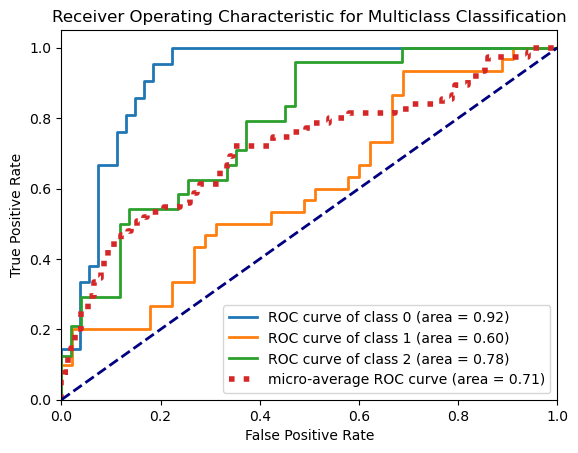

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
n_classes


# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score.shape


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
lw = 2

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()
